In [1]:
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel

In [2]:
from transformers import AutoProcessor, AutoModel


processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14-336")
model = AutoModel.from_pretrained("openai/clip-vit-large-patch14-336")

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/844 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.42k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/842k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/512k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.12M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.59G [00:00<?, ?B/s]

In [36]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# image is a pillow image object
def plot_image(image):
    plt.imshow(image)

In [41]:
import torch

def predict(image, labels):
    # resize image
    if image.size != (640, 480):
        resized_image = image.resize((640, 480))
        inputs = processor(
            text=labels, images=resized_image, return_tensors="pt", padding=True
        )
    else:
        inputs = processor(
            text=labels, images=image, return_tensors="pt", padding=True
        )

    
    # inference
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
    
    # max probability and index
    prob, idx = torch.max(probs, dim=1)
    
    return f"predicted label: {labels[int(idx)]} with probability : {float(prob)}"

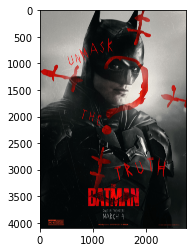

In [42]:
image = Image.open("botmon.jpeg")
plot_image(image)

In [43]:
predict(image, labels=["batman", "ironman", "some random dude"])

'predicted label: batman with probability : 0.9996901750564575'

In [44]:
predict(image, labels=["a movie poster", "some comic art"])

'predicted label: a movie poster with probability : 0.9600139856338501'